<a href="https://colab.research.google.com/github/jolex007/COS_DL/blob/master/3_HomeWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Второе домашнее задание



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Описание нейросети

In [2]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ###
    n_x = 2
    n_h = 4
    n_y = 1
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

## Инициализация параметров

In [3]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # ЭТУ_СТРОКУ_НЕ_РЕДАКТИРОВАТЬ
    
    ### START CODE HERE ###
    W1 = np.random.randn(n_h, n_x)
    b1 = np.ones((n_h, 1)) * (1.)
    W2 = np.random.randn(n_y, n_h)
    b2 = np.ones((n_y, 1)) * (1.)
    ### END CODE HERE ###
        
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

## Forward propogation

In [4]:
def forward_propagation(X, parameters, activation_func):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    activation_func -- function of activation
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    ### START CODE HERE ###
    #print("b1 shape is", b1.shape, "W1 shape is", W1.shape, "X shape is", X.shape)
    Z1 = W1 @ X + b1
    A1 = activation_func(Z1)
    Z2 = W2 @ A1 + b2
    A2 = activation_func(Z2)
    ### END CODE HERE ###
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

## Backward propagation

In [5]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (formula 4)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example

    
    ### START CODE HERE ###
    
    #logprobs = None
    cost = -1./m * np.nan_to_num((Y * np.log(A2) + (1 - Y) * np.log(1 - A2))).sum()
    
    ### END CODE HERE ###
    
    return cost

In [6]:
def backward_propagation(parameters, cache, X, Y, diff_activation_func):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    diff_activation_func -- diff of activation function
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]

    ### START CODE HERE ###
    dZ2 = A2 - Y
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * dZ2.sum()
    dZ1 = np.dot(W2.T, dZ2) * diff_activation_func(Z1)
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims=True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

## Обновление параметров

In [7]:
def update_parameters(parameters, grads, recount_1, recount_2, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
   
    ### START CODE HERE ###
    W1 = W1 - learning_rate * recount_1.update_dw(dW1)
    b1 = b1 - learning_rate * recount_1.update_db(db1)
    W2 = W2 - learning_rate * recount_2.update_dw(dW2)
    b2 = b2 - learning_rate * recount_2.update_db(db2)
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

## AdaM и обычная функция пересчета аргумента

In [28]:
class gradient_descent:
    def __init__(self):
        pass
    
    def update_dw(self, dw):
        return dw
    
    def update_db(self, db):
        return db
    
    pass


class AdaM:
    def __init__(self, b1, b2, eps):
        self.b1 = b1
        self.b2 = b2
        self.eps = eps
        self.t = 1


        self.V_dw = 0
        self.V_db = 0

        self.S_dw = 0
        self.S_db = 0

    def update_dw(self, dw):
        self.V_dw = self.b1 * self.V_dw + (1 - self.b1) * dw
        self.S_dw = self.b2 * self.S_dw + (1 - self.b2) * ((dw) ** 2)

        V_dw_correct = self.V_dw / (1 - (self.b1 ** self.t))
        S_dw_correct = self.S_dw / (1 - (self.b2 ** self.t))

        result = V_dw_correct / (np.sqrt(S_dw_correct + self.eps))

        return result
    
    def update_db(self, db):
        self.V_db = self.b1 * self.V_db + (1 - self.b1) * db
        self.S_db = self.b2 * self.S_db + (1 - self.b2) * ((db) ** 2)

        V_db_correct = self.V_db / (1 - (self.b1 ** self.t))
        S_db_correct = self.S_db / (1 - (self.b2 ** self.t))

        result = V_db_correct / (np.sqrt(S_db_correct + self.eps))

        self.t += 1

        return result

    pass

## Сама модель

In [9]:
def nn_model(X, Y, n_h, activation_func, diff_activation_func,
             recount_1_layer=gradient_descent(), recount_2_layer=gradient_descent(),
             num_iterations=10000, learning_rate=1.2, print_cost=False, cost_iter=100):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    func -- function of activation
    diff_func -- diff of activation function
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Инициализируйте параметры. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    
    ### START CODE HERE ###
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    costs = []
    
    # Loop (градиентный спуск)

    for i in range(0, num_iterations):
        
        ### START CODE HERE ###
        # Шаг forward propagation
        A2, cache = forward_propagation(X, parameters, activation_func)
        
        # Подсчет функции потерь
        cost = compute_cost(A2, Y, parameters)
 
        # Шаг backpropagation
        grads = backward_propagation(parameters, cache, X, Y, diff_activation_func)

        # Обновление весов
        parameters = update_parameters(parameters, grads, recount_1_layer, recount_2_layer, learning_rate=learning_rate)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
        
        if i % cost_iter == 0:
            costs.append(cost)

    return {'params' : parameters,
            'costs' : costs}

## Вывод предсказания


In [10]:
def predict(parameters, X, activation_func, threshold=0.5):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    threshold -- used for defining prediction
    activation_func -- activation function
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters, activation_func)
    predictions = (A2>threshold).astype(int)
    ### END CODE HERE ###
    
    return predictions

## Загрузка датасета

In [11]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

In [12]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(14,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    
    #plt.figure(figsize=(14,8))
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    #plt.show()

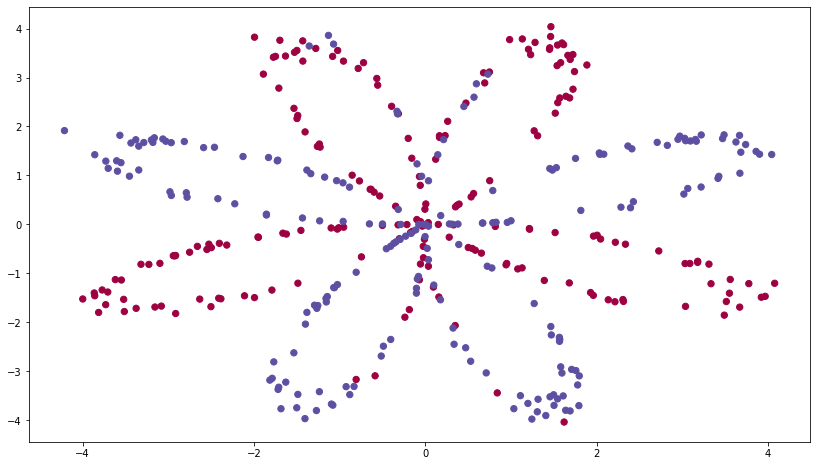

In [13]:
X, Y = load_planar_dataset() #загружаем датасет
plt.figure(figsize=(14,8))
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

## Дополнительные функции

In [14]:
def sigmoid(x):
    return 1. / (np.exp(-x) + 1)

def sigmoid_diff(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [15]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def tanh_diff(x):
    return 4. / ((np.exp(x) + np.exp(-x)) ** 2)

In [16]:
def ReLU(x):
    return np.where(x > 0, x, 0)

def ReLU_diff(x):
    return np.where(x > 0, 1, 0)

In [17]:
def LeakyReLU(x, alpha=0.5):
    return np.where(x > 0, x, x * 0.2)

def LeakyReLU_diff(x, alpha=0.5):
    return np.where(x > 0, 1, 0.2)

## Обучение и предсказание

## Вывод графиков

In [18]:
import pylab

In [19]:
# Частота вывода cost
costs_iter = 10

In [20]:
def normalize_params(params):
    for i, elem in enumerate(params):
        if i == 0 and elem >= 3.2:
            elem = 3.2
        elif elem >= 3.2:
            elem = params[i - 1]

Training models with 4 neurons


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in matmul
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in matmul
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


Training models with 8 neurons
Training models with 12 neurons
Training models with 20 neurons


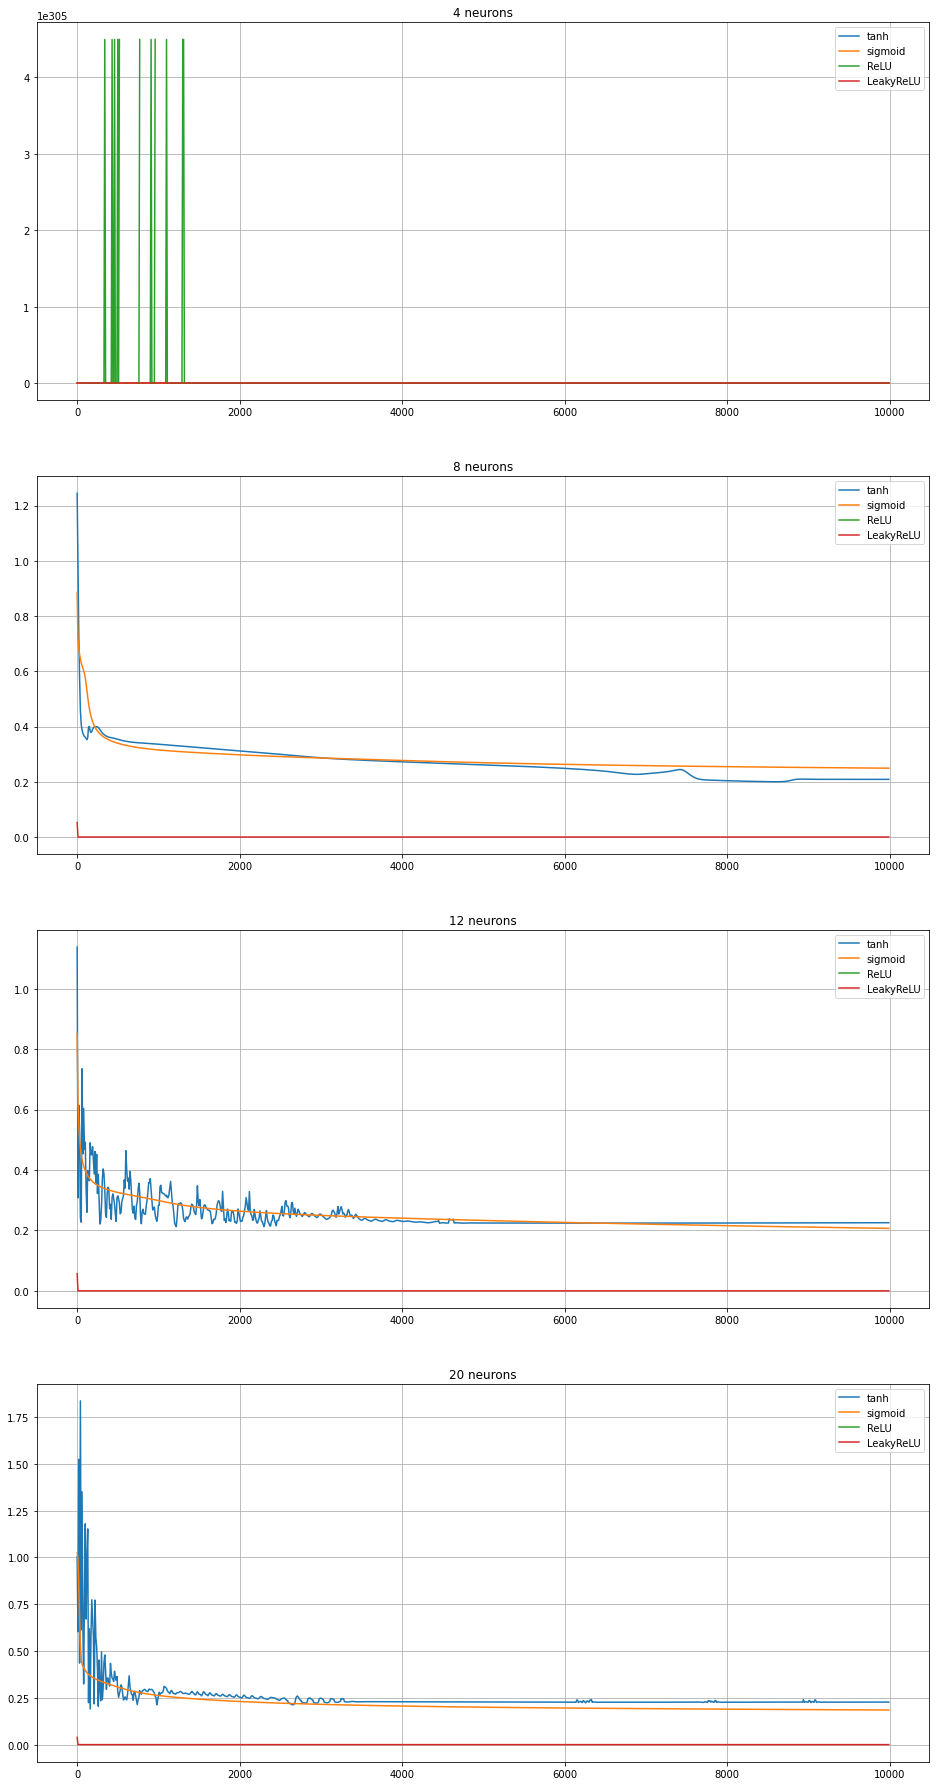

In [33]:
fig = plt.figure(figsize=(16, 32))

neurons = [4, 8, 12, 20]

tanh_par = []
sigmoid_par = []
ReLU_par = []
LeakyReLU_par = []

activ_functions = [tanh, sigmoid, ReLU, LeakyReLU]
activ_functions_diff = [tanh_diff, sigmoid_diff, ReLU_diff, LeakyReLU_diff]
functions_par = [tanh_par, sigmoid_par, ReLU_par, LeakyReLU_par]
values = ['tanh', 'sigmoid', 'ReLU', 'LeakyReLU']

for pos, neuro in enumerate(neurons):
    print(f'Training models with {neuro} neurons')
    plt.subplot(4, 1, pos + 1)

    for func, func_diff, param in zip(activ_functions, activ_functions_diff, functions_par):
        param.append(nn_model(X, Y, neuro, func, func_diff,
                             num_iterations=10000,
                             learning_rate=1.2,
                             print_cost=False,
                             cost_iter=costs_iter))
        
        normalize_params(param[-1]['costs'])

        plt.plot(list(range(0, len(param[-1]['costs']) * costs_iter, costs_iter)), param[-1]['costs'])

    plt.grid(True)
    plt.legend(values, loc='upper right')
    plt.title(f'{neuro} neurons')

plt.show()



## Сравним методы пересчета градиента


Training model with 4 neurons and gradient descent


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log


Training model with 4 neurons and AdaM
Training model with 8 neurons and gradient descent
Training model with 8 neurons and AdaM
Training model with 12 neurons and gradient descent
Training model with 12 neurons and AdaM
Training model with 20 neurons and gradient descent
Training model with 20 neurons and AdaM


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


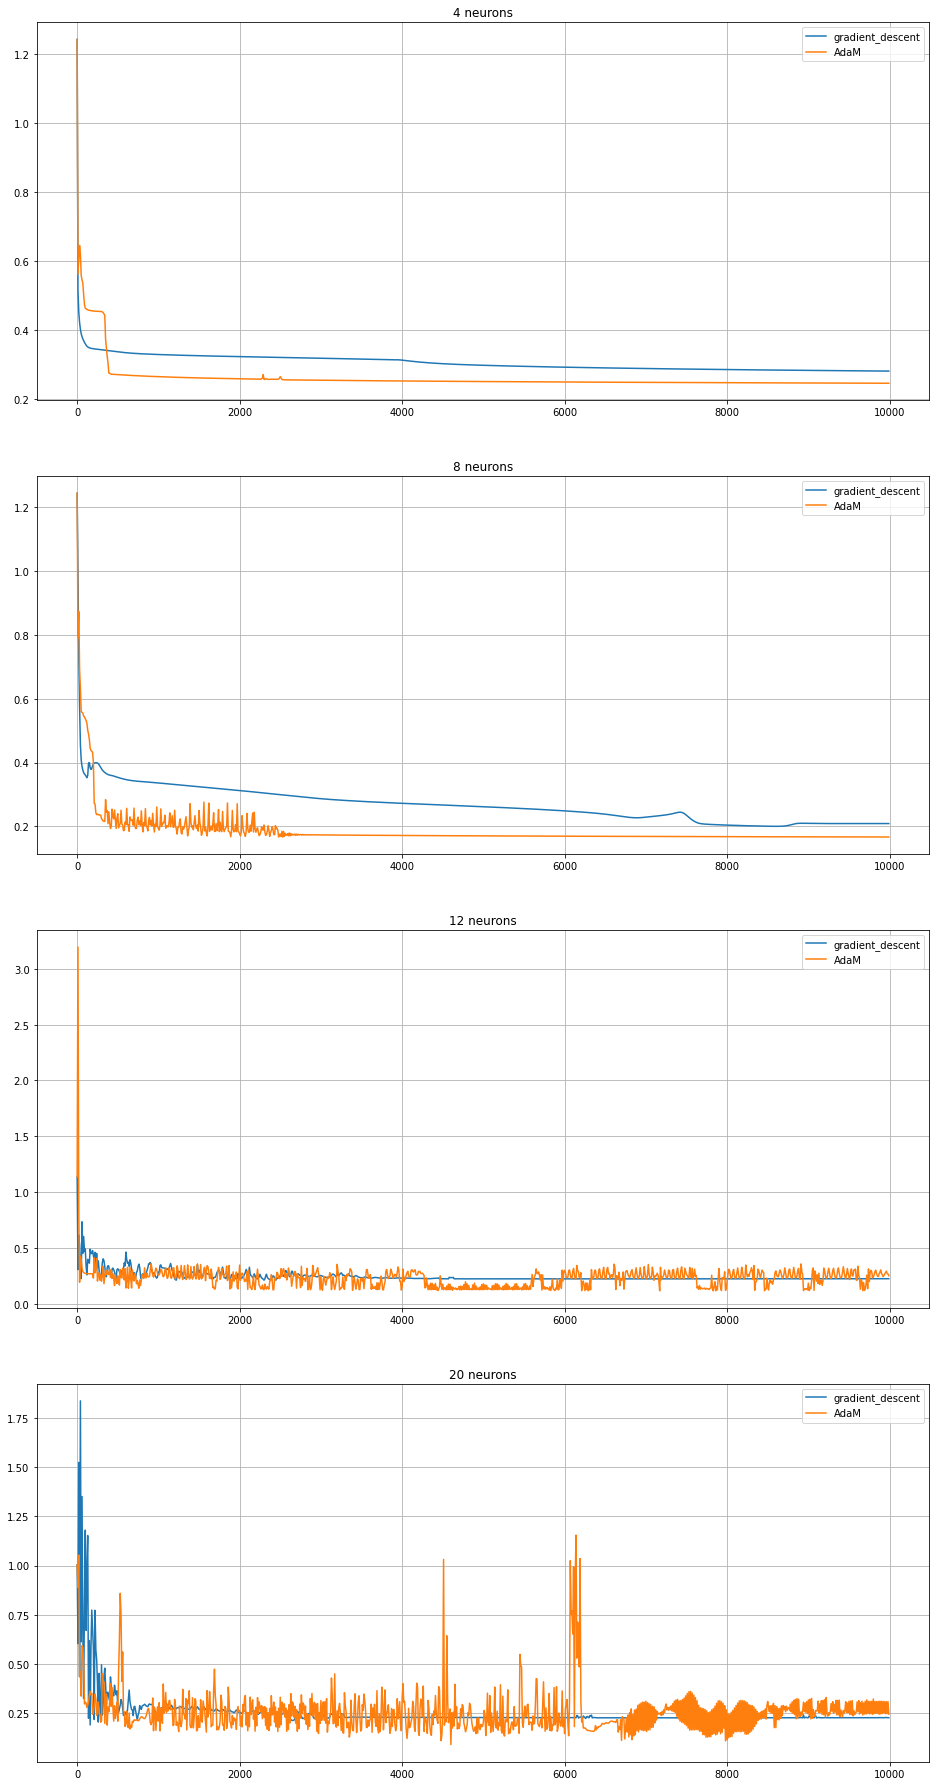

In [32]:
fig = plt.figure(figsize=(16, 32))

neurons = [4, 8, 12, 20]

tanh_par = []

for pos, neuro in enumerate(neurons):
    print(f'Training model with {neuro} neurons and gradient descent')
    plt.subplot(4, 1, pos + 1)

    grad_desc_param = nn_model(X, Y, neuro, tanh, tanh_diff,
                            num_iterations=10000,
                            learning_rate=1.2,
                            print_cost=False,
                            cost_iter=costs_iter)
    
    normalize_params(grad_desc_param['costs'])

    plt.plot(list(range(0, len(grad_desc_param['costs']) * costs_iter, costs_iter)), grad_desc_param['costs'])

    print(f'Training model with {neuro} neurons and AdaM')

    AdaM_param = nn_model(X, Y, neuro, tanh, tanh_diff,
                            recount_1_layer=AdaM(0.9, 0.999, 0.001),
                            recount_2_layer=AdaM(0.9, 0.999, 0.001),
                            num_iterations=10000,
                            learning_rate=1.2,
                            print_cost=False,
                            cost_iter=costs_iter)
    
    normalize_params(AdaM_param['costs'])

    plt.plot(list(range(0, len(AdaM_param['costs']) * costs_iter, costs_iter)), AdaM_param['costs'])


    plt.grid(True)
    plt.legend(['gradient_descent', 'AdaM'], loc='upper right')
    plt.title(f'{neuro} neurons')

In [ ]:
# Отрисуем вывод нейросети на плоскости
plot_decision_boundary(lambda x: predict(parameters_LeakyReLU, x.T, LeakyReLU), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))